# Customer Satisfaction Ecommerce

O objetivo deste projeto prático é prever a satisfação do cliente a partir de um conjunto de dados de ecommerce do Brasil.

Dados podem ser baixados aqui: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Colunas da tabela:

1. **order_status**: status do pedido (entregue ou cancelado) (delivered or canceled).

2. **order_purchase_timestamp**: timestamp (data/hora) da compra de cada item.

3. **order_delivered_customer_date**: data real de entrega do pedido do cliente.

4. **order_estimated_delievy_date**: data de entrega estimada que foi fornecida ao cliente no momento da compra.

5. **shipping_limit_date**: data limite de envio do vendedor para a transferência do pedido ao parceiro logístico.

6. **payment_sequential**: método de pagamento utilizado pelo consumidor.

7. **payment_type**: método de pagamento preferido do cliente.

8. **payment_installments**: número de parcelas de pagamento preferido do cliente.

9. **payment_value**: valor da transação.

10. **price**: custo de cada item.

11. **freight_value**: custo de transporte para cada item (se um pedido tiver mais de um item, o valor do frete é dividido entre os itens).

12. **product_category**: categoria de cada item.

13. **product_name_length**: número de caracteres extraídos do nome do produto.

14. **product_description_length**: número de caracteres extraídos da descrição do produto.

15. **product_photos_qty**: número de fotos de produtos que foram publicadas.

16. **review_score**: classificação dada por um cliente em uma pesquisa de satisfação que varia de 1 a 5.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Semana 1 

## Carregamento dos dados

In [7]:
# carregar dataset com infos sobre os pedidos - usando url raw de outro repositório
olist_orders = 'https://raw.githubusercontent.com/andressaapio/pythontutorials/main/data/olist/' 

orders = pd.read_csv(olist_orders + 'olist_orders_dataset.csv')
orders.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# carregar dataset com infos sobre as avaliações dos pedidos
olist_reviews = (olist_orders + 'olist_order_reviews_dataset.csv')

reviews = pd.read_csv(olist_reviews)
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
# carregar dataset com infos sobre os pagamentos dos pedidos
olist_payments = (olist_orders + 'olist_order_payments_dataset.csv')

payments = pd.read_csv(olist_payments)
payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
# carregar dataset do consumidor
olist_customers = (olist_orders + 'olist_customers_dataset.csv')

customers = pd.read_csv(olist_customers)
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
# carregar dataset com os itens dos pedidos
olist_order_items = (olist_orders + 'olist_order_items_dataset.csv')

order_items = pd.read_csv(olist_order_items)
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# carregar dataset com infos sobre os produtos
olist_products = (olist_orders + 'olist_products_dataset.csv')

products = pd.read_csv(olist_products)
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
# carregar dataset sobre os vendedores
olist_sellers = (olist_orders + 'olist_sellers_dataset.csv')

sellers = pd.read_csv(olist_sellers)
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
# carregar dataset com a tradução dos produtos:  product_category_name_translation
olist_product_translation = (olist_orders + 'product_category_name_translation.csv')

product_translation = pd.read_csv(olist_product_translation)
product_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


###Merge 


> Datasets criados:<br>
orders<br>
reviews<br>
payments<br>
customers<br>
order_items<br>
products<br>
sellers<br>
product_translation<br>



In [17]:
#tamanho dos datasets

orders.shape

(99441, 8)

In [18]:
reviews.shape

(99224, 7)

In [19]:
payments.shape

(103886, 5)

In [20]:
customers.shape

(99441, 5)

In [21]:
order_items.shape

(112650, 7)

In [22]:
products.shape

(32951, 9)

In [23]:
sellers.shape

(3095, 4)

In [24]:
product_translation.shape

(71, 2)

Combinando as tabelas referentes a 'consumidor' 


In [25]:
#merge de olist_orders_dataset.csv, olist_order_reviews_dataset.csv, olist_order_payments_dataset.csv e olist_customer_dataset.csv em order_id
customer_df = pd.merge(orders, reviews, on='order_id')
customer_df = pd.merge(customer_df, payments,  on='order_id')
customer_df = pd.merge(customer_df, customers, on='customer_id')
customer_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


Combinando as tabelas referentes a 'vendedor'

In [26]:
# merge de olist_order_items_dataset e olist_products_dataset em product_id
seller_df = pd.merge(order_items, products, on='product_id')

# merge de B e olist_sellers_dataset em seller_id
seller_df = pd.merge(seller_df, sellers, on='seller_id')

# merge de C e product_category_name_translation.csv em product_category_name
seller_df = pd.merge(seller_df, product_translation, on='product_category_name')
seller_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


Combinando as tabelas referentes a 'consumidor' e 'vendedor'

In [27]:
customer_df.shape

(103677, 22)

In [28]:
seller_df.shape

(111023, 19)

In [29]:
# merge de customer_df e seller_df em order_id
df_ecommerce = pd.merge(customer_df, seller_df, on='order_id')
df_ecommerce.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


### Seleção dos dados do dataset

In [30]:
# visualizar as colunas do dataset:
df_ecommerce.loc[[]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english


In [31]:
#outra forma de ver somente as colunas:
df_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [32]:
# Selecionar apenas as colunas importantes
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght', 'product_photos_qty','review_score']]

#Corrigindo typos e nomes das colunas
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [33]:
# tamanho da tabela atualizada
df_ecommerce.shape

(115609, 16)

## Limpeza dos dados e pré processamento

### Remover valores nulos (NaN)

In [34]:
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [35]:
df_ecommerce.dropna(how='any', inplace=True) #Drop N/A
df_ecommerce.shape

(113209, 16)

### Converter em formato de data

In [39]:
#retirando as horas, deixando somente datas
df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date

In [53]:
df_ecommerce

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,20,14,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,27,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,1,credit_card,3,195.00,174.90,20.10,baby,52.0,828.0,4.0,4,24,22,6
115605,delivered,1,credit_card,5,271.01,205.99,65.02,home_appliances_2,51.0,500.0,2.0,5,31,25,9
115606,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38,17,4
115607,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38,17,4


In [52]:
#arrumar código aqui!!!!
#subtraindo as datas de compras dos dias de entrega, previsão de entrega e envio
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

KeyError: ignored

In [41]:
df_ecommerce

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,16 days,8 days,4 days
1,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,16 days,8 days,4 days
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,16 days,8 days,4 days
3,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-30,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,20 days,14 days,6 days
4,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-13,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,27 days,9 days,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,2018-02-06,2018-02-28,2018-03-02,2018-02-12,1,credit_card,3,195.00,174.90,20.10,baby,52.0,828.0,4.0,4,24 days,22 days,6 days
115605,delivered,2017-08-27,2017-09-21,2017-09-27,2017-09-05,1,credit_card,5,271.01,205.99,65.02,home_appliances_2,51.0,500.0,2.0,5,31 days,25 days,9 days
115606,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38 days,17 days,4 days
115607,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38 days,17 days,4 days


In [42]:
#transformando o timedelta em número inteiro
cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [43]:
df_ecommerce

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
1,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,16,8,4
3,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-30,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,20,14,6
4,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-13,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,27,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,2018-02-06,2018-02-28,2018-03-02,2018-02-12,1,credit_card,3,195.00,174.90,20.10,baby,52.0,828.0,4.0,4,24,22,6
115605,delivered,2017-08-27,2017-09-21,2017-09-27,2017-09-05,1,credit_card,5,271.01,205.99,65.02,home_appliances_2,51.0,500.0,2.0,5,31,25,9
115606,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38,17,4
115607,delivered,2018-01-08,2018-01-25,2018-02-15,2018-01-12,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,38,17,4


In [44]:
#removendo 4 colunas que não serão usadas
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

##Visualização rápida dos dados

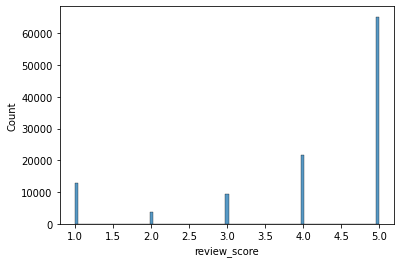

In [48]:
#histograma do score de avaliações
sns.histplot(x='review_score', data=df_ecommerce)

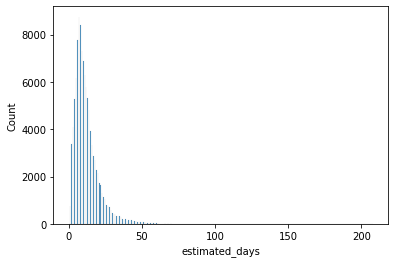

In [46]:
#histograma 
sns.histplot(x='estimated_days', data=df_ecommerce)

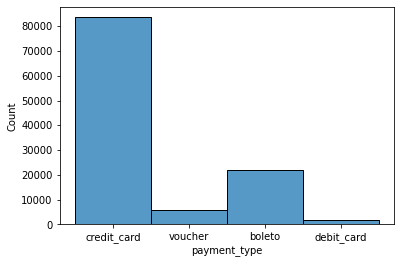

In [47]:
sns.histplot(x='payment_type', data=df_ecommerce)